In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/sentiment_analysis_financial_news.csv', encoding='Windows-1252')
df.head()

,response,sentence,Unnamed: 2,Unnamed: 3
0,neutral,"According to Gran , the company has no plans t...",NaN,NaN
1,neutral,Technopolis plans to develop in stages an area...,NaN,NaN
2,negative,The international electronic industry company ...,NaN,NaN
3,positive,With the new production plant the company woul...,NaN,NaN
4,positive,According to the company 's updated strategy f...,NaN,NaN


In [2]:
#drop tabel yang tidak diperlukan
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
df.head()

,response,sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
#mengimpor beberapa library untuk text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import re
from collections import Counter

In [4]:
#download stopword untuk text processing
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#function untuk melakukan preprocessing
def remove_punct(text):
  text = "".join([char for char in text if char not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  return text

def remove_stopwords(text, STOPWORDS):
  #funtion untuk melakukan filltering
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def stem_words(text, stemmer):
  #function untuk mengubah ke kata dasar (stemming)
  return " ".join([stemmer.stem(word) for word in text.split()])

def remove_freqwords(text, FREQWORDS):
  #function untuk menghapus kata yang sering keluar dalam 1 kalimat(hanya tampil 1)
  return " ".join([word for word in str(text).split() if word not in FREQWORDS])

def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

In [6]:
#melakukan filltering
df['sentence'] = df['sentence'].apply(lambda x: remove_punct(x))
", ".join(stopwords)
STOPWORDS = set(stopwords)
df["filltering"] = df["sentence"].apply(lambda text: remove_stopwords(text, STOPWORDS))
df.head()

,response,sentence,filltering
0,neutral,According to Gran the company has no plans to...,According Gran company plans move production R...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans develop stages area less squ...
2,negative,The international electronic industry company ...,The international electronic industry company ...
3,positive,With the new production plant the company woul...,With new production plant company would increa...
4,positive,According to the company s updated strategy fo...,According company updated strategy years Baswa...


In [7]:
#melakukan stemming
stemmer = PorterStemmer()
df["text_stemmed"] = df["filltering"].apply(lambda text: stem_words(text, stemmer))
df.head(3)

,response,sentence,filltering,text_stemmed
0,neutral,According to Gran the company has no plans to...,According Gran company plans move production R...,accord gran compani plan move product russia a...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans develop stages area less squ...,technopoli plan develop stage area less squar ...
2,negative,The international electronic industry company ...,The international electronic industry company ...,the intern electron industri compani elcoteq l...


In [8]:
#melihat rata-rata kata yang sering keluar
cnt = Counter()
for text in df["text_stemmed"].values:
  for word in text.split():
      cnt[word] += 1
cnt.most_common(10)#melihat 10 kata yang sering keluar    

[('the', 1354),
 ('eur', 1310),
 ('compani', 969),
 ('mn', 593),
 ('oper', 571),
 ('said', 544),
 ('finnish', 513),
 ('sale', 500),
 ('million', 439),
 ('share', 438)]

In [9]:
#menghapus rata-rata kata yang sering keluar
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
df["text_stop_freq"] = df["text_stemmed"].apply(lambda text: remove_freqwords(text, FREQWORDS))
df.head(3)

,response,sentence,filltering,text_stemmed,text_stop_freq
0,neutral,According to Gran the company has no plans to...,According Gran company plans move production R...,accord gran compani plan move product russia a...,accord gran plan move product russia although ...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans develop stages area less squ...,technopoli plan develop stage area less squar ...,technopoli plan develop stage area less squar ...
2,negative,The international electronic industry company ...,The international electronic industry company ...,the intern electron industri compani elcoteq l...,intern electron industri elcoteq laid ten empl...


In [10]:
#menghapus kolom hasil text processing kecuali hasil terakhir
df = df.drop(columns=["sentence", "filltering", "text_stemmed"])
df.head()

,response,text_stop_freq
0,neutral,accord gran plan move product russia although ...
1,neutral,technopoli plan develop stage area less squar ...
2,negative,intern electron industri elcoteq laid ten empl...
3,positive,with new product plant would increas capac mee...
4,positive,accord updat strategi year baswar target longt...


In [11]:
df = df.rename(columns={"text_stop_freq":"comments"})
df.head()

,response,comments
0,neutral,accord gran plan move product russia although ...
1,neutral,technopoli plan develop stage area less squar ...
2,negative,intern electron industri elcoteq laid ten empl...
3,positive,with new product plant would increas capac mee...
4,positive,accord updat strategi year baswar target longt...


In [12]:
#merubah ke one-hot-encoding
category = pd.get_dummies(df.response)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='response')
df_baru

,comments,negative,neutral,positive
0,accord gran plan move product russia although ...,0,1,0
1,technopoli plan develop stage area less squar ...,0,1,0
2,intern electron industri elcoteq laid ten empl...,1,0,0
3,with new product plant would increas capac mee...,0,0,1
4,accord updat strategi year baswar target longt...,0,0,1
...,...,...,...,...
4841,london marketwatch price end lower london mond...,1,0,0
4842,rinkuskiai beer fell per cent litr kauno alu b...,0,1,0
4843,profit fell includ vessel gain,1,0,0
4844,net paper segment decreas second quarter secon...,1,0,0


In [14]:
#mengubah nilai dataframe ke dalam tipe data array menggunakan atribut values
sentence = df_baru['comments'].values
label = df_baru[['negative', 'neutral', 'positive']].values

In [15]:
#membagi data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
sentence_latih, sentence_test, label_latih, label_test = train_test_split(sentence, label, test_size=0.2)

In [19]:
#ubah setiap data ke numerik dengan Tokenizer
#setelah itu mengonversi sampel menjadi sequence

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=8766, oov_token='x')
tokenizer.fit_on_texts(sentence_latih)
tokenizer.fit_on_texts(sentence_test)

sekuens_latih = tokenizer.texts_to_sequences(sentence_latih)
sekuens_test = tokenizer.texts_to_sequences(sentence_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [27]:
from tensorflow.python.keras.layers.core import Dropout
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=8766, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.75):
      print('\n akurasi sudah terpenuhi')
      self.model.stop_training = True
callback = myCallback()

In [29]:
history = model.fit(padded_latih, label_latih,
                    epochs=50,
                    batch_size=32,
                    
                    validation_data=(padded_test, label_test),
                    callbacks=[callback],
                    verbose=2)

Epoch 1/50
122/122 - 6s - loss: 0.9504 - accuracy: 0.5815 - val_loss: 0.8187 - val_accuracy: 0.6320
Epoch 2/50
122/122 - 4s - loss: 0.7275 - accuracy: 0.6847 - val_loss: 0.7328 - val_accuracy: 0.6804
Epoch 3/50
122/122 - 4s - loss: 0.5416 - accuracy: 0.7701 - val_loss: 0.7757 - val_accuracy: 0.6588
Epoch 4/50
122/122 - 4s - loss: 0.4480 - accuracy: 0.8088 - val_loss: 0.8546 - val_accuracy: 0.6794
Epoch 5/50
122/122 - 4s - loss: 0.3497 - accuracy: 0.8418 - val_loss: 0.9337 - val_accuracy: 0.7082
Epoch 6/50
122/122 - 4s - loss: 0.2383 - accuracy: 0.9177 - val_loss: 1.0076 - val_accuracy: 0.7082
Epoch 7/50
122/122 - 4s - loss: 0.1594 - accuracy: 0.9474 - val_loss: 1.3188 - val_accuracy: 0.7278
Epoch 8/50
122/122 - 4s - loss: 0.1235 - accuracy: 0.9610 - val_loss: 1.1865 - val_accuracy: 0.7340
Epoch 9/50
122/122 - 4s - loss: 0.1035 - accuracy: 0.9665 - val_loss: 1.3602 - val_accuracy: 0.7268
Epoch 10/50
122/122 - 4s - loss: 0.1085 - accuracy: 0.9659 - val_loss: 1.4459 - val_accuracy: 0.7454

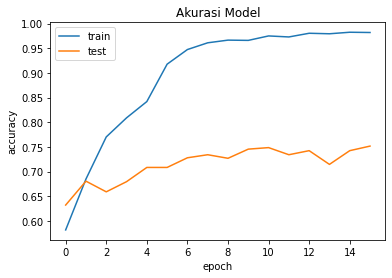

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

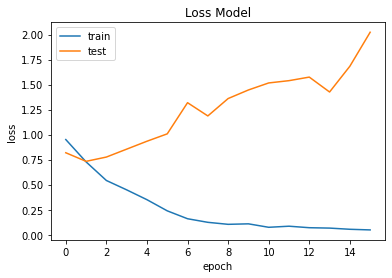

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()